# Notebook Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# organizing imports
import os

#third-party
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
sns.set()

# Load Data

Load the iris dataset using scikit-learn's built-in dataset

In [4]:
data = datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### What Problem are we trying to solve?

Trying to use attributes of flowers to predict the species of the flower.

Specifically, I am trying to use the sepal and petal lengths and widths to predict if an iris flower is of type: setosa, versicolour, or virginica.

This is a multi-class classification problem

## Create a Pandas DataFrame from the data

In [7]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [8]:
df['target'] = data['target']

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Basic Descriptive Statistics

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Distributions of feature and target

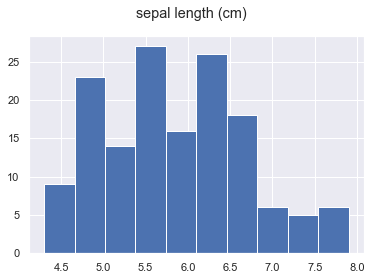

In [11]:
col = 'sepal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

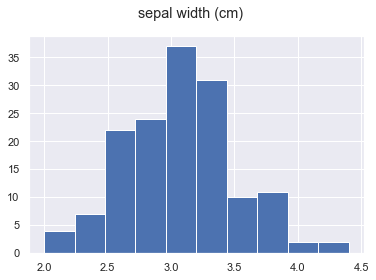

In [12]:
col = 'sepal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

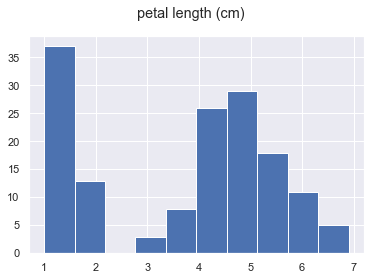

In [13]:
col = 'petal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

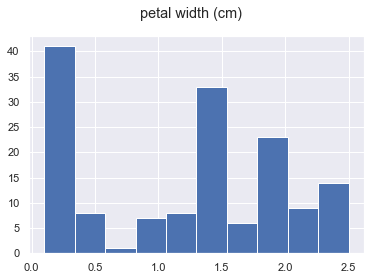

In [14]:
col = 'petal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

## Relationship of the data features with the target

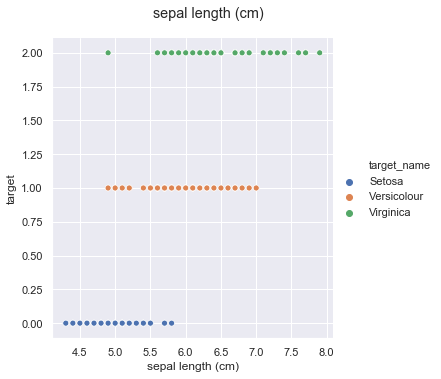

In [15]:
# create a new column to give names to the targets rather than 0, 1, 2
df['target_name'] = df['target'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# using seaborn to create a chart showing the relationship with our target and sepal length
col = 'sepal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

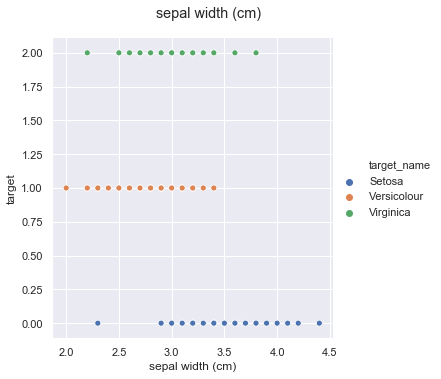

In [16]:
col = 'sepal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

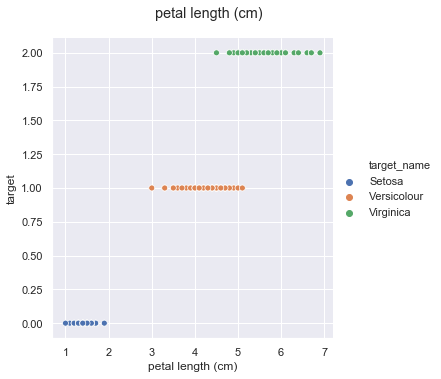

In [17]:
col = 'petal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

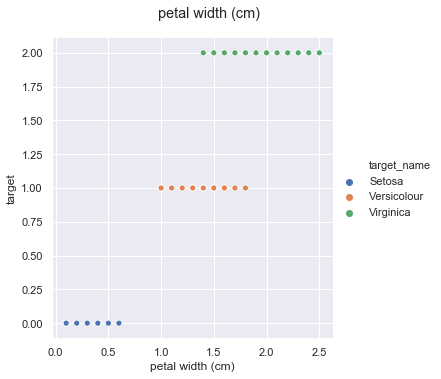

In [18]:
col = 'petal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
plt.suptitle(col, y=1.05)
plt.show()

#### We can see from the above graphs that we could easily predict Setosa flowers from petal length and width, but it will be a bit harder to tell the difference between versicolour and virginica iris'

## Pairplots

/Users/Ty/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Ty/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Ty/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


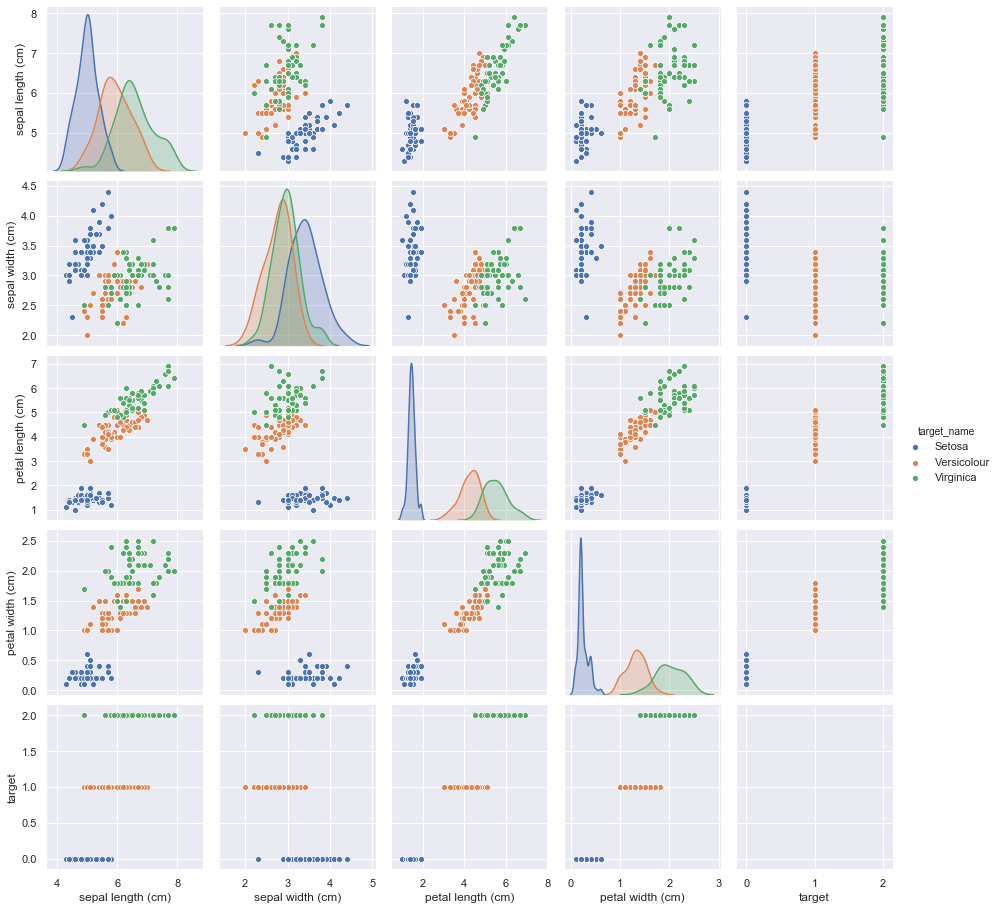

In [19]:
# plot every variable against every other variable in the dataset

sns.pairplot(df, hue='target_name')

## Train Test Split
##### We want to split our data up to use some for training the model and some for testing the model. We do not want to train the model on what we plan to test it with

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_train, df_test = train_test_split(df, test_size=0.25)

## Prepare data for modeling
##### This involves splitting the data back out into plain Numpy arrays

In [22]:
# x train data is all but the target columns in a numpy array
x_train = df_train.drop(columns = ['target', 'target_name']).values

In [23]:
# y train is just the taget column in a numpy array
y_train = df_train['target'].values

## Modeling - What is our Baseline?

What is the simplest model we can think of?

In this case, if the baseline model is just randomly guessing the species of flower or guessing a single species for each data point we would expect a model accuracy of 0.33 (33%) since we have 3 different classes that are evenly balanced.

Our models should at least be better than 33% accurate

## Modeling Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

## Using a Validation Set to evaluate our model

In [25]:
model = LogisticRegression()

In [26]:
# split training data into training and validation
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)
print(xt.shape)
print(xv.shape)

(84, 4)
(28, 4)


In [27]:
# use fit with training data
# trains the model on the xt data
model.fit(xt, yt)

/Users/Ty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Use the model to predict on the validation data
y_pred = model.predict(xv)

In [29]:
# quicker built in way rather than comparing them manually and getting the mean
model.score(xv, yv)

1.0

## Using Cross-Validation
Evaluate the model in iterations
A different chunk is used each time to validate

In [30]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [31]:
model = LogisticRegression(max_iter=200)

In [32]:
accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

In [33]:
np.mean(accuracies)

0.9545454545454545

## What points are being misclassified?
What did the model get wrong

In [34]:
y_pred = cross_val_predict(model, x_train, y_train, cv=5)
predicted_correctly_mask = y_pred == y_train
not_predicted_correctly = ~predicted_correctly_mask

In [35]:
x_train[not_predicted_correctly]

array([[6.3, 2.8, 5.1, 1.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [6.3, 2.5, 4.9, 1.5]])

In [36]:
df_predictions = df_train.copy()

In [37]:
df_predictions['correct_prediction'] = predicted_correctly_mask
df_predictions['prediction'] = y_pred
df_predictions['prediction_label'] = df_predictions['prediction'].map({0:'setosa', 1:'versicolour', 2:'virginica'})

In [38]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
85,6.0,3.4,4.5,1.6,1,Versicolour,True,1,versicolour
22,4.6,3.6,1.0,0.2,0,Setosa,True,0,setosa
102,7.1,3.0,5.9,2.1,2,Virginica,True,2,virginica
131,7.9,3.8,6.4,2.0,2,Virginica,True,2,virginica
118,7.7,2.6,6.9,2.3,2,Virginica,True,2,virginica


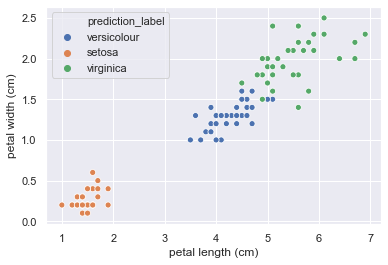

In [39]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='prediction_label', data=df_predictions, )

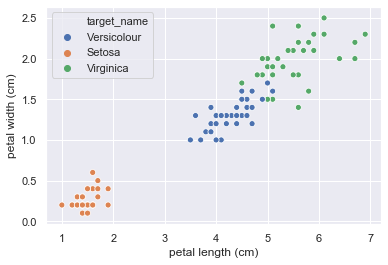

In [40]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target_name', data=df_predictions, )

In [41]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    '''
    takes in prediction and label information and returns 3 scatterplots. One showing actual labels,
    one showing predicted labels, and one showing correct and incorrect predictions
    '''
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='target_name', data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

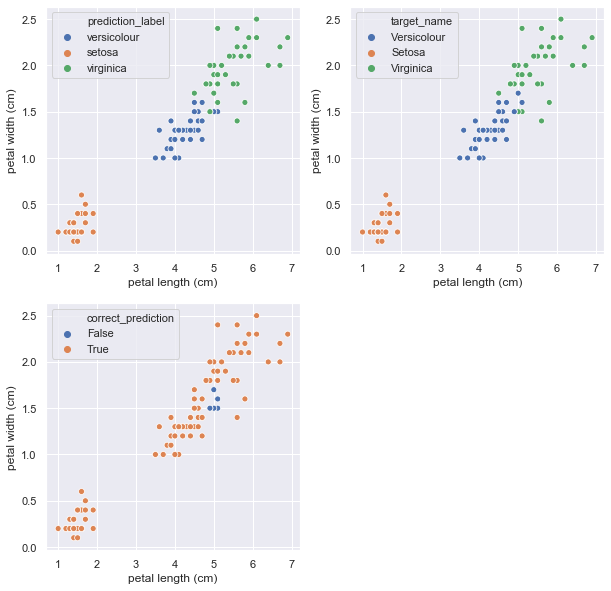

In [42]:
plot_incorrect_predictions(df_predictions, 'petal length (cm)', 'petal width (cm)')

## Model Tuning
Trying to determine the parameters of the model that maximize the model performance

In [43]:
# in this case we want to look at models within LogisticRegression? and see what may need to be changed
# C parameter = regularization
# More regularization means simpler model that is less prone to memorizing datapoints

In [44]:
# Go through regularization parameters and determine which would be best
for reg_param in (1, 2, 2.5, 3, 4, 5, 10):
    print(f'Regularization Parameter: {reg_param}')
    model = LogisticRegression(max_iter=200,C=reg_param)
    accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f'Model accuracy: {np.mean(accuracies) * 100:.2f}%')

Regularization Parameter: 1
Model accuracy: 95.45%
Regularization Parameter: 2
Model accuracy: 95.45%
Regularization Parameter: 2.5
Model accuracy: 95.45%
Regularization Parameter: 3
Model accuracy: 95.45%
Regularization Parameter: 4
Model accuracy: 95.45%
Regularization Parameter: 5
Model accuracy: 95.45%
Regularization Parameter: 10
Model accuracy: 95.45%


## Final Model

In [45]:
# Take the best C and make our final model
# Since the C parameter peaked at 2, we will set C=2

model = LogisticRegression(max_iter=200,C=2)

#### How well will the model do on the test set

In [46]:
# These sre the values we set aside to test the model on

x_test = df_test.drop(columns = ['target', 'target_name']).values
y_test = df_test['target'].values
x_test.shape

(38, 4)

#### Train our model using our full training dataset

In [47]:
model.fit(x_train, y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_test_pred = model.predict(x_test)

In [49]:
test_set_correctly_classified = y_test_pred == y_test

test_set_accuracy = np.mean(test_set_correctly_classified)

In [50]:
print(f'Test set accuracy: {test_set_accuracy * 100:.2f}')

Test set accuracy: 97.37


In [51]:
# test accuracy being lower than training accuracy may show an overfit model

In [52]:
df_predictions_test = df_test.copy()
df_predictions_test['correct_prediction'] = test_set_correctly_classified
df_predictions_test['prediction'] = y_test_pred
df_predictions_test['prediction_label'] = df_predictions_test['prediction'].map({0:'setosa', 1:'versicolour', 2:'virginica'})


In [53]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,correct_prediction,prediction,prediction_label
100,6.3,3.3,6.0,2.5,2,Virginica,True,2,virginica
144,6.7,3.3,5.7,2.5,2,Virginica,True,2,virginica
20,5.4,3.4,1.7,0.2,0,Setosa,True,0,setosa
0,5.1,3.5,1.4,0.2,0,Setosa,True,0,setosa
120,6.9,3.2,5.7,2.3,2,Virginica,True,2,virginica


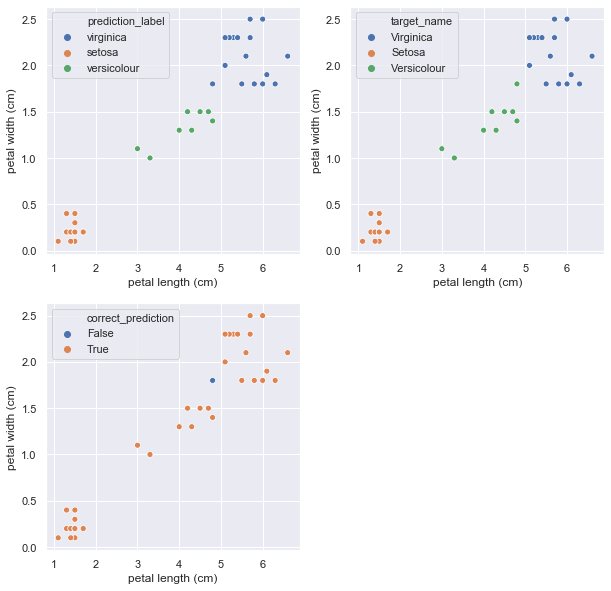

In [54]:
plot_incorrect_predictions(df_predictions_test, x_axis_feature='petal length (cm)', y_axis_feature='petal width (cm)')

## In Conclusion

We achieved an accuracy of 97.37% on the test dataset using a logistic regression model with these model parameters:

"""
LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
"""